In [57]:
# CTG Fetal Health Classification

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from IPython.display import display, HTML

# 1. Load the Dataset

In [59]:
df = pd.read_csv('fetal_health.csv')
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


# 2. Explore the Dataset

In [60]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [61]:
print(df.head())

   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0

### Display class distribution summary with percentages

In [62]:
class_counts = df['fetal_health'].value_counts().sort_index()
total = len(df)
print("The dataset contains {} instances with the following class distribution:"
.format(total))
print("Normal: {} ({:.1f}%)".format(int(class_counts[1.0]), class_counts[1.0]/total*100))
print("Suspect: {} ({:.1f}%)".format(int(class_counts[2.0]), class_counts[2.0]/total*100))
print("Pathological: {} ({:.1f}%)".format(int(class_counts[3.0]), class_counts[3.0]/total*100))
print(df['fetal_health'].value_counts())

The dataset contains 2126 instances with the following class distribution:
Normal: 1655 (77.8%)
Suspect: 295 (13.9%)
Pathological: 176 (8.3%)
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


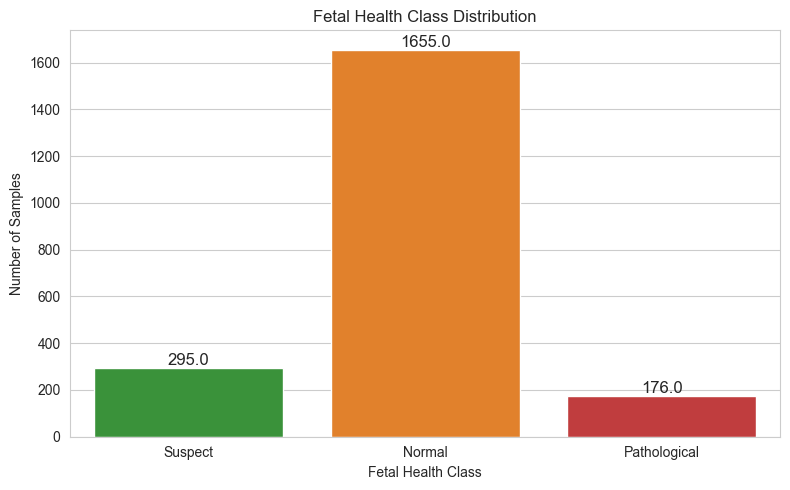

In [63]:
label_map = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
df['fetal_health_label'] = df['fetal_health'].map(label_map)

plt.figure(figsize=(8,5))
ax = sns.countplot(
    x='fetal_health_label', 
    hue='fetal_health_label',   # Add hue for color mapping
    data=df,
    palette=['#2ca02c', '#ff7f0e', '#d62728'],  # green, orange, red
    legend=False                 # Hide legend since x-axis labels are clear
)

plt.title('Fetal Health Class Distribution')
plt.xlabel('Fetal Health Class')
plt.ylabel('Number of Samples')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 10, f'{height}', 
            ha='center', fontsize=12)

plt.tight_layout()
plt.show()

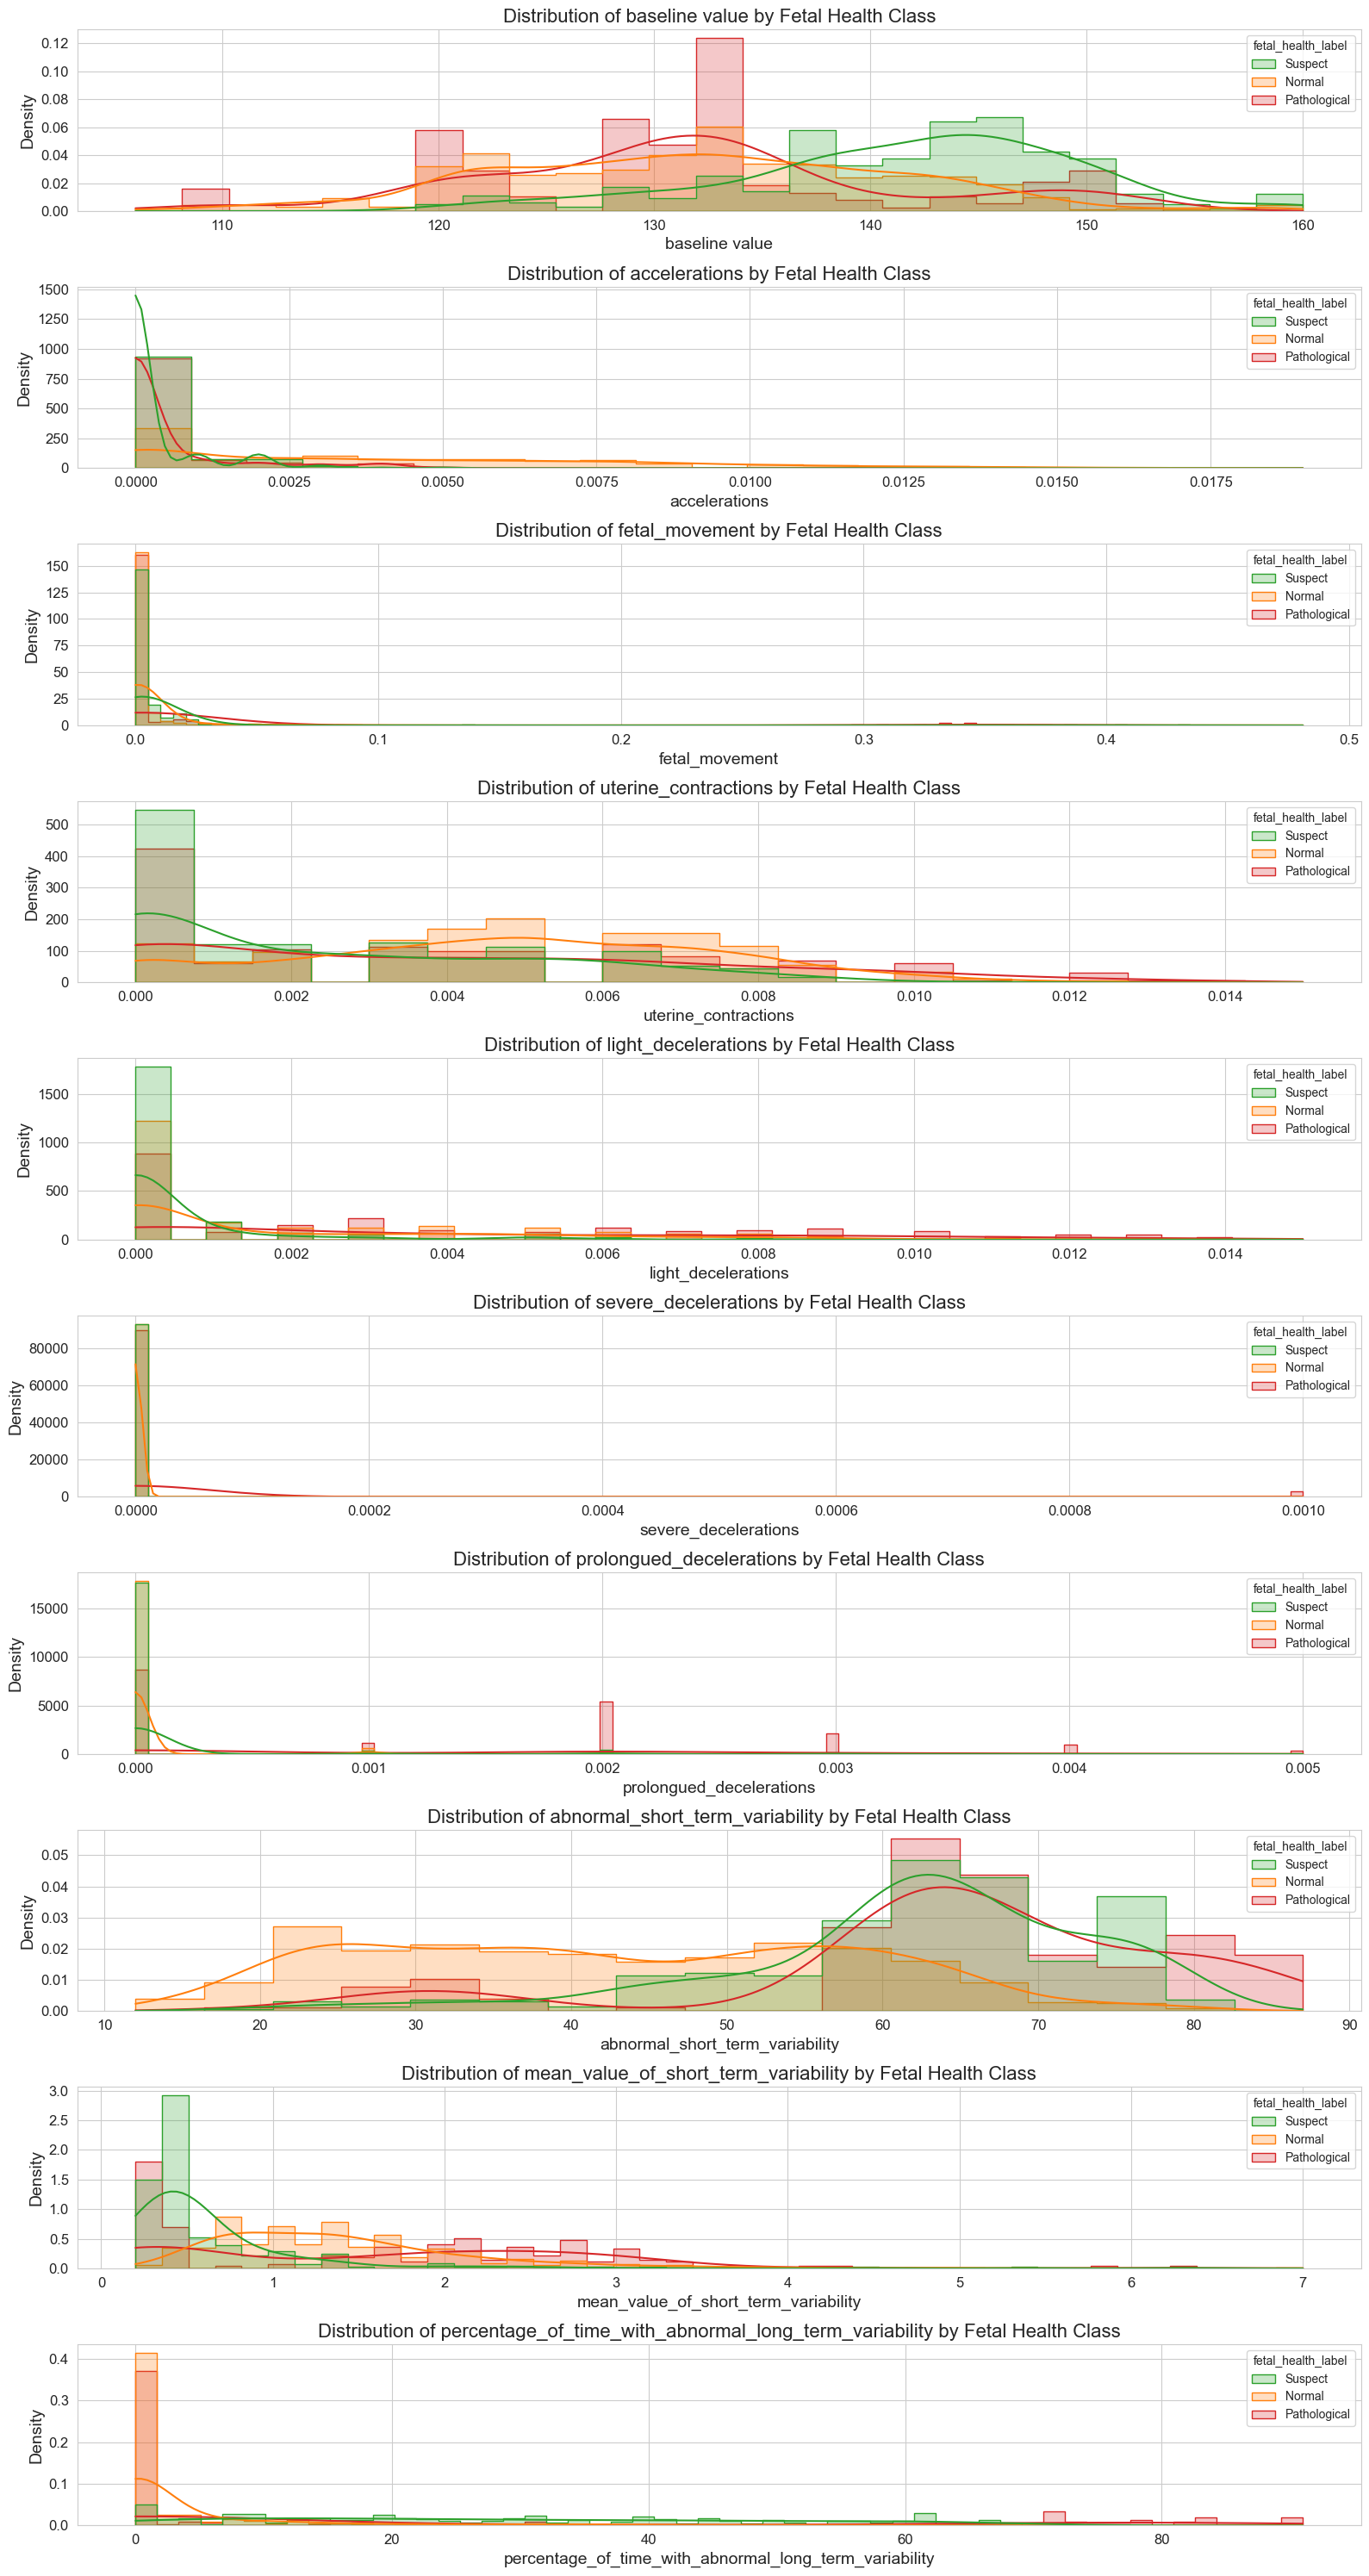

In [64]:
# Set seaborn style properly
sns.set_style('whitegrid')

label_map = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
df['fetal_health_label'] = df['fetal_health'].map(label_map)

X = df.drop(['fetal_health', 'fetal_health_label'], axis=1)
top_features = X.columns[:10]

plt.figure(figsize=(16, 30))

for i, col in enumerate(top_features, 1):
    plt.subplot(len(top_features), 1, i)
    sns.histplot(
        data=df,
        x=col,
        kde=True,
        hue='fetal_health_label',
        palette=['#2ca02c', '#ff7f0e', '#d62728'],
        element='step',
        stat='density',
        common_norm=False
    )
    plt.title(f'Distribution of {col} by Fetal Health Class', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# 3. Feature Scaling

In [65]:
X = df.drop(['fetal_health', 'fetal_health_label'], axis=1)
y = df['fetal_health']

In [66]:
print(X.dtypes)

baseline value                                            float64
accelerations                                             float64
fetal_movement                                            float64
uterine_contractions                                      float64
light_decelerations                                       float64
severe_decelerations                                      float64
prolongued_decelerations                                  float64
abnormal_short_term_variability                           float64
mean_value_of_short_term_variability                      float64
percentage_of_time_with_abnormal_long_term_variability    float64
mean_value_of_long_term_variability                       float64
histogram_width                                           float64
histogram_min                                             float64
histogram_max                                             float64
histogram_number_of_peaks                                 float64
histogram_

In [67]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=67)

In [69]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state=67)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Show class distribution before and after SMOTE
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({1.0: 1323, 2.0: 236, 3.0: 141})
After SMOTE: Counter({1.0: 1323, 2.0: 1323, 3.0: 1323})


# 5. Initialize Classifiers

In [70]:
rf = RandomForestClassifier(random_state=67)
svm = SVC(kernel='rbf', probability=True, random_state=67)
logreg = LogisticRegression(max_iter=1000, random_state=67)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=67)

classifiers = {
    "Random Forest": rf,
    "SVM": svm,
    "Logistic Regression": logreg,
    "K-Nearest Neighbors": knn,
    "Decision Tree": dt
}

# 6. Cross Validation Evaluation

In [71]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=67)

In [72]:
f1_scores = {}
for name, model in classifiers.items():
    scores = cross_val_score(model, X_scaled, y, cv=cv, scoring='f1_macro')
    f1_scores[name] = scores.mean()
    print(f"{name} F1 (Macro Avg): {scores.mean():.4f}")

Random Forest F1 (Macro Avg): 0.8962
SVM F1 (Macro Avg): 0.8372
Logistic Regression F1 (Macro Avg): 0.7944
K-Nearest Neighbors F1 (Macro Avg): 0.8157
Decision Tree F1 (Macro Avg): 0.8673


### Confusion matrix visualization


Random Forest Evaluation:
              precision    recall  f1-score   support

         1.0       0.95      0.99      0.97       332
         2.0       0.86      0.75      0.80        59
         3.0       1.00      0.83      0.91        35

    accuracy                           0.94       426
   macro avg       0.94      0.85      0.89       426
weighted avg       0.94      0.94      0.94       426



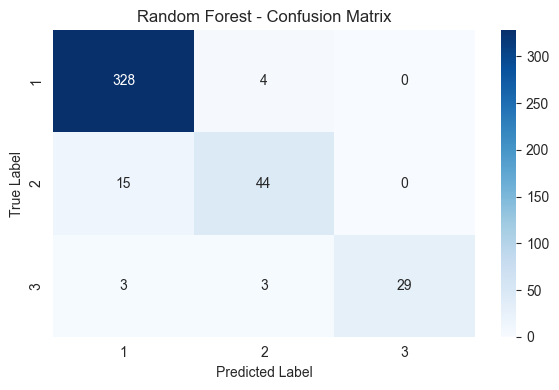


SVM Evaluation:
              precision    recall  f1-score   support

         1.0       0.93      0.96      0.95       332
         2.0       0.68      0.68      0.68        59
         3.0       0.96      0.71      0.82        35

    accuracy                           0.90       426
   macro avg       0.86      0.78      0.81       426
weighted avg       0.90      0.90      0.90       426



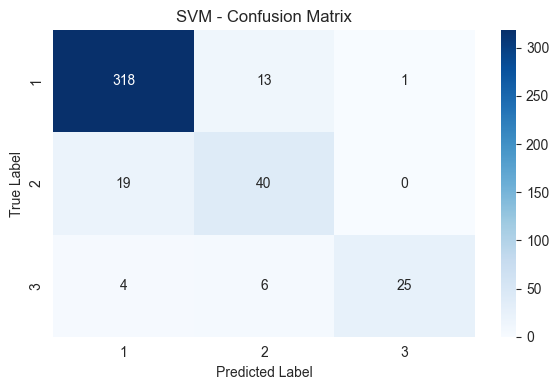


Logistic Regression Evaluation:
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.95       332
         2.0       0.66      0.66      0.66        59
         3.0       0.90      0.74      0.81        35

    accuracy                           0.90       426
   macro avg       0.83      0.79      0.81       426
weighted avg       0.90      0.90      0.90       426



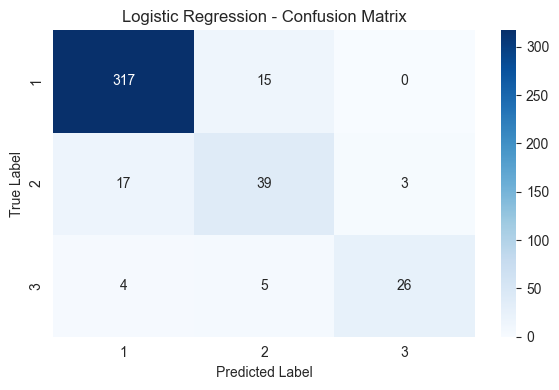


K-Nearest Neighbors Evaluation:
              precision    recall  f1-score   support

         1.0       0.94      0.96      0.95       332
         2.0       0.68      0.71      0.69        59
         3.0       0.96      0.66      0.78        35

    accuracy                           0.90       426
   macro avg       0.86      0.78      0.81       426
weighted avg       0.90      0.90      0.90       426



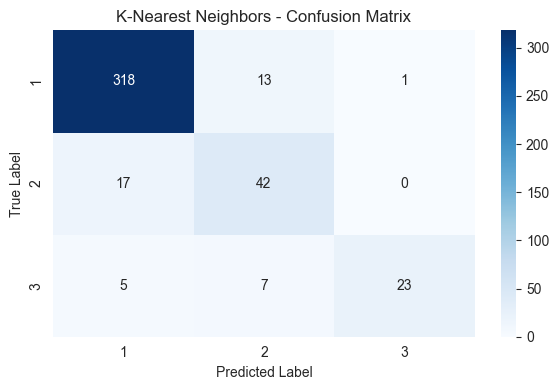


Decision Tree Evaluation:
              precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       332
         2.0       0.82      0.76      0.79        59
         3.0       0.91      0.86      0.88        35

    accuracy                           0.93       426
   macro avg       0.89      0.86      0.88       426
weighted avg       0.93      0.93      0.93       426



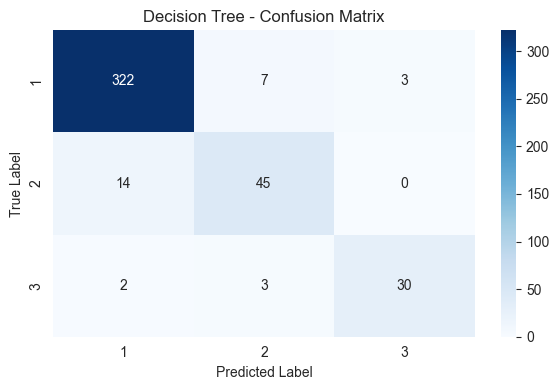

In [73]:
for name, model in classifiers.items():
    print(f"\n{name} Evaluation:")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    preds = model.predict(X_test)
    
    # Print classification report
    print(classification_report(y_test, preds))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, preds)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

In [74]:
summary_list = []

total_test_samples = len(y_test)  # Make sure y_test is defined

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    report_dict = classification_report(y_test, preds, output_dict=True)
    macro_avg = report_dict['macro avg']
    
    support = macro_avg.get('support', None)
    support_pct = (support / total_test_samples * 100) if support is not None else None
    
    summary_list.append({
        'Model': name,
        'F1-score (macro avg)': f"{macro_avg['f1-score'] * 100:.1f}%",
    })

summary_df = pd.DataFrame(summary_list)

from IPython.display import display

display(summary_df.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#4A90E2'), ('color', 'white'), ('font-size', '16px')]},
    {'selector': 'td', 'props': [('font-size', '14px'), ('padding', '8px')]},
    {'selector': 'tr:nth-child(even)', 'props': [('background-color', '#f2f2f2')]}
]))

,Model,F1-score (macro avg)
0,Random Forest,89.1%
1,SVM,81.4%
2,Logistic Regression,80.7%
3,K-Nearest Neighbors,80.7%
4,Decision Tree,87.8%


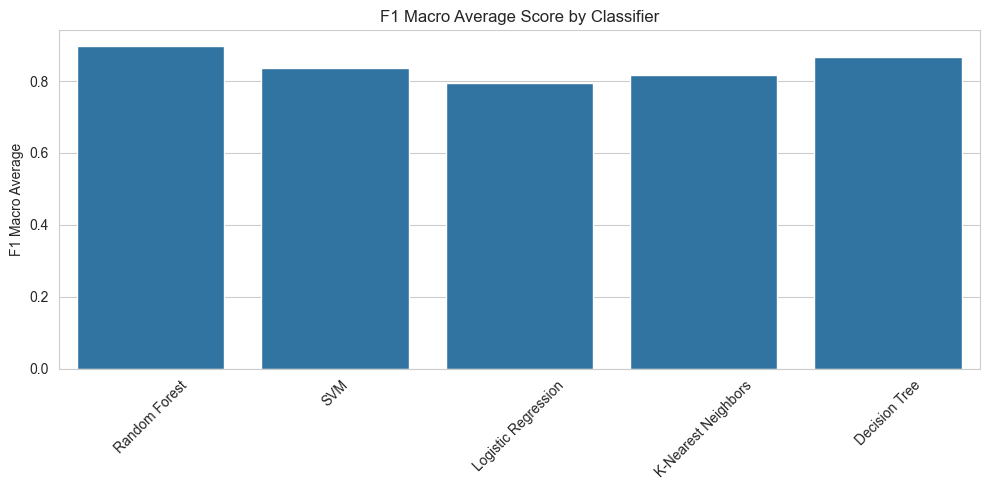

In [75]:
# Plot F1 score comparison
plt.figure(figsize=(10, 5))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()))
plt.title("F1 Macro Average Score by Classifier")
plt.ylabel("F1 Macro Average")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()